# 目次
- 1. 目的
- 2. 前提情報
- 3. データ概要
- 4. 分析・結果
- 5. 今後の展望

## 1. 目的
史上最強として五輪メダル獲得も期待されている日本男子バレーに注目し、2023年バレーボールネーションズリーグ（VNL）の試合データを対象に分析を行った。  
日本はパリ五輪メダル獲得が目標と明言しており、分析対象大会にて銅メダルを獲得している他、30年ぶりに強豪国ブラジルに勝利した。  
一方で世界ランキング1位のポーランドには準決勝で敗れる、2023年のオリンピック予選ではアメリカに敗れるなど、他の強豪国に勝つためには課題も残る。  
そこで本分析では世界ランキング上位5カ国に焦点を当て、各国に対して日本の強みと弱みを分析することを目的とした。  
具体的には以下2点を行った。  
  - 2023年6月時点の世界ランキング上位5カ国+日本の平均本数の区間推定を実施し、日本と各国の違いを分析  
  - 2023年6月時点の世界ランキング上位5カ国+日本のデータでクラスタリングを行い、クラスタ間の違いを分析

# 2. 背景
- 分析対象であるバレーボールネーションズリーグは毎年行われており、16カ国が参加する
- 1セット25点、3セット先取で勝敗が決まる（5セット目は15点）
- 分析時点（2024年6月）は大会期間中であり、日々世界ランキングが変動するため1年前のランキングを採用
- 2023年6月時点の日本の世界ランキングは6位  （参考サイト: https://vbtawagoto.com/worldranking2023_01）


## 2-1. 主な用語
| 用語 | 詳細 |
| :--- | :--- |
| ATTACK | 相手のコートに攻撃すること。相手コートに落ちれば直接得点に繋がる。 |
| BLOCK | 相手からのアタックにに対し壁を作ること。相手コートに落ちれば直接得点に繋がる。 |
| BLOCK Touch | 相手が打ったアタックがブロックに当たること。上手く触れれば味方のチャンスボールに繋がる。 |
| SERVE | 相手のコートにサーブを打つこと。効果的なサーブを打つことで相手が良い体制でアタックを打てなくなる。 |
| RECEPTION | サーブレシーブのこと。上手くセッターに上がるとどのポジションからもアタックが打ちやすくなる。 |
| DIG | 相手からのスパイクをレシーブすること。上手く上がれば味方の攻撃に繋げることができる。 |

# 3. データ概要
- バレーボールネーションズリーグ（VNL）2023年の全試合データ（https://github.com/volleyballdataroom/VNL/blob/main/2023/VNL_Men_Team_2023.csv）
- サンプル数: 全 208 試合
- データサイズ: 2.7MB
- 期間: 2023/6/6〜2023/7/23

## 3-1. 前処理
- 試合ごとにセット数が異なるため、新しく1セットあたりのATTACK, BLOCK, SERVE, RECEPTION, DIG平均本数を表示するカラムを作成。
- 4セット以下で試合が終了した場合は、1試合の合計本数をセット数で割った。  
  5セットで終了した試合については5セット目は15点先取であることを考慮し、4 + (15/25) = 4.6セットで1試合の合計本数を割った。  
  （例: 1試合あたりのATTACK_Pointが50点だった場合 → 4セットで試合が終了した場合は50/4=12.5本/SET、5セットで試合が終了した場合は50/4.6≒10.9本/SETとした。）

## 3-2. 特徴量の説明（分析に使用した特徴量のみ抽出）
| カラム名 | 詳細 |
| :--- | :--- |
| Team | 国名 |
| VS_Team | 対戦国 |
| ATTACK_Point/SET | 1セットあたりのアタック決定本数 |
| ATTACK_Errors/SET | 1セットあたりのミス本数 |
| ATTACK_Attempts/SET | 1セットあたりのアタック後得点にもミスにも繋がらなかった本数 |
| ATTACK_Total/SET | 1セットあたりのアタック本数 |
| BLOCK_Point/SET | 1セットあたりのブロック決定本数 |
| BLOCK_Errors/SET | 1セットあたりのブロックミス本数（ブロックをしたがアウトになった等） |
| BLOCK_Touches/SET | 1セットあたりのブロックタッチ本数 |
| BLOCK_Total/SET | 1セットあたりのブロック本数 |
| SERVE_Point/SET' | 1セットあたりのサービスエース本数 |
| SERVE_Errors/SET' | 1セットあたりのサービスミス本数 |
| SERVE_Attempts/SET' | 1セットあたりのアタック後得点にもミスにも繋がらなかった本数 |
| SERVE_Total/SET' | 1セットあたりのサービスを打った本数 |
| RECEPTION_Successful/SET | 1セットあたりのサーブレシーブをセッターがほとんど動かずに返せた本数 |
| RECEPTION_Errors/SET | 1セットあたりのサーブレシーブミス本数 |
| RECEPTION_Attempts/SET | 1セットあたりのサーブレシーブ時に乱されてセッターが4歩以上動かなくてはいけない位置に返せた本数 |
| RECEPTION_Total/SET | 1セットあたりのサーブレシーブ本数 |
| DIG_Digs/SET | 1セットあたりのディグ本数 |
| DIG_Errors/SET | 1セットあたりのディグをミスした本数（コート外に弾いた等） |
| DIG_Total/SET | DIG_Digs/SETとDIG_Errors/SETの合計本数 |
| SET_Count | 合計セット本数（3~5の値をとる） |
| Won | 0:負け、1:勝ち |

# 4. 分析・結果

## 4.0 前処理

In [1]:
#インポート
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats

In [2]:
#加工前のデータを表示
pd.set_option('display.max_columns', None)
df_original = pd.read_csv('VNL_Men_Team_2023.csv')
df_original.head()

,Season,Match,Y/M/D,Pool,Week,City,Country,Team,VS_Team,SET_Won,SET_Lost,Point1,Point2,Point3,Point4,Point5,VS_Point1,VS_Point2,VS_Point3,VS_Point4,VS_Point5,SET,SCORING_Total ABS,SCORING_Attack Points,SCORING_Block Points,SCORING_Serve Points,SCORING_Errors,ATTACK_Point,ATTACK_Errors,ATTACK_Attempts,ATTACK_Total,BLOCK_Point,BLOCK_Errors,BLOCK_Touches,BLOCK_Total,SERVE_Point,SERVE_Errors,SERVE_Attempts,SERVE_Total,RECEPTION_Successful,RECEPTION_Errors,RECEPTION_Attempts,RECEPTION_Total,DIG_Digs,DIG_Errors,DIG_Total,SET_Point,SET_Errors,SET_Attempts,SET_Total
0,2023,1,2023/6/6,2,1,Nagoya,Japan,Bulgaria,China,2,3,20,25,21,25,9,25,21,25,20,15,ALL SETS,66,52,10,4,-,52,23,31,106,10,18,14,42,4,16,80,100,31,8,44,83,32,2,39,22,1,83,106
1,2023,1,2023/6/6,2,1,Nagoya,Japan,Bulgaria,China,2,3,20,25,21,25,9,25,21,25,20,15,SET 1,13,10,2,1,-,10,6,8,24,2,4,4,10,1,1,19,21,7,3,9,19,7,0,9,5,0,18,23
2,2023,1,2023/6/6,2,1,Nagoya,Japan,Bulgaria,China,2,3,20,25,21,25,9,25,21,25,20,15,SET 2,16,12,2,2,-,12,1,6,19,2,3,4,9,2,4,18,24,9,1,6,16,4,0,5,5,1,13,19
3,2023,1,2023/6/6,2,1,Nagoya,Japan,Bulgaria,China,2,3,20,25,21,25,9,25,21,25,20,15,SET 3,18,14,3,1,-,14,6,10,30,3,2,2,7,1,6,15,22,9,1,12,22,9,0,11,4,0,27,31
4,2023,1,2023/6/6,2,1,Nagoya,Japan,Bulgaria,China,2,3,20,25,21,25,9,25,21,25,20,15,SET 4,15,12,3,0,-,12,5,5,22,3,6,3,12,0,4,20,24,3,1,11,15,9,1,10,5,0,17,22


In [3]:
#SET=ALL SETSのデータだけ取得
df = df_original.query('SET =="ALL SETS"')

#勝ち負けのカラムを追加
df['Won'] = 0
df.loc[df['SET_Won']==3, 'Won'] = 1

#SET数を表示するカラムを作成
df['SET_Count'] = df['SET_Won'] + df['SET_Lost']

#1セットあたりの本数を表示するカラムを作成
# 処理対象のカラムリスト
target_columns = ['ATTACK_Point', 'ATTACK_Errors', 'ATTACK_Attempts', 'ATTACK_Total',
                  'BLOCK_Point', 'BLOCK_Errors', 'BLOCK_Touches', 'BLOCK_Total',
                  'SERVE_Point', 'SERVE_Errors', 'SERVE_Attempts', 'SERVE_Total',
                  'RECEPTION_Successful', 'RECEPTION_Errors', 'RECEPTION_Attempts', 'RECEPTION_Total',
                  'DIG_Digs', 'DIG_Errors', 'DIG_Total']

new_columns = {
    f'{column}/SET': np.where(df['SET_Count'] == 5, df[column] / 4.6, df[column] / df['SET_Count'])
    for column in target_columns
}

# assignを使って新しいカラムをデータフレームに追加
df = df.assign(**new_columns)
# 結果の確認
df.head()

/var/folders/kq/rxqwtkh92x57kwqgqzk_hkpc0000gn/T/ipykernel_10157/565981536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Won'] = 0
/var/folders/kq/rxqwtkh92x57kwqgqzk_hkpc0000gn/T/ipykernel_10157/565981536.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SET_Count'] = df['SET_Won'] + df['SET_Lost']


,Season,Match,Y/M/D,Pool,Week,City,Country,Team,VS_Team,SET_Won,SET_Lost,Point1,Point2,Point3,Point4,Point5,VS_Point1,VS_Point2,VS_Point3,VS_Point4,VS_Point5,SET,SCORING_Total ABS,SCORING_Attack Points,SCORING_Block Points,SCORING_Serve Points,SCORING_Errors,ATTACK_Point,ATTACK_Errors,ATTACK_Attempts,ATTACK_Total,BLOCK_Point,BLOCK_Errors,BLOCK_Touches,BLOCK_Total,SERVE_Point,SERVE_Errors,SERVE_Attempts,SERVE_Total,RECEPTION_Successful,RECEPTION_Errors,RECEPTION_Attempts,RECEPTION_Total,DIG_Digs,DIG_Errors,DIG_Total,SET_Point,SET_Errors,SET_Attempts,SET_Total,Won,SET_Count,ATTACK_Point/SET,ATTACK_Errors/SET,ATTACK_Attempts/SET,ATTACK_Total/SET,BLOCK_Point/SET,BLOCK_Errors/SET,BLOCK_Touches/SET,BLOCK_Total/SET,SERVE_Point/SET,SERVE_Errors/SET,SERVE_Attempts/SET,SERVE_Total/SET,RECEPTION_Successful/SET,RECEPTION_Errors/SET,RECEPTION_Attempts/SET,RECEPTION_Total/SET,DIG_Digs/SET,DIG_Errors/SET,DIG_Total/SET
0,2023,1,2023/6/6,2,1,Nagoya,Japan,Bulgaria,China,2,3,20,25,21,25,9,25,21,25,20,15,ALL SETS,66,52,10,4,-,52,23,31,106,10,18,14,42,4,16,80,100,31,8,44,83,32,2,39,22,1,83,106,0,5,11.304348,5.000000,6.739130,23.043478,2.173913,3.913043,3.043478,9.130435,0.869565,3.478261,17.391304,21.739130,6.739130,1.739130,9.565217,18.043478,6.956522,0.434783,8.478261
6,2023,1,2023/6/6,2,1,Nagoya,Japan,China,Bulgaria,3,2,25,21,25,20,15,20,25,21,25,9,ALL SETS,76,56,12,8,-,56,17,27,100,12,14,15,41,8,23,75,106,19,4,61,84,25,1,32,8,3,87,98,1,5,12.173913,3.695652,5.869565,21.739130,2.608696,3.043478,3.260870,8.913043,1.739130,5.000000,16.304348,23.043478,4.130435,0.869565,13.260870,18.260870,5.434783,0.217391,6.956522
12,2023,2,2023/6/6,2,1,Nagoya,Japan,Japan,Iran,3,0,25,25,25,-,-,16,22,19,-,-,ALL SETS,55,47,4,4,-,47,13,24,84,4,12,11,27,4,12,58,74,10,3,32,45,42,1,48,6,0,77,83,1,3,15.666667,4.333333,8.000000,28.000000,1.333333,4.000000,3.666667,9.000000,1.333333,4.000000,19.333333,24.666667,3.333333,1.000000,10.666667,15.000000,14.000000,0.333333,16.000000
16,2023,2,2023/6/6,2,1,Nagoya,Japan,Iran,Japan,0,3,16,22,19,-,-,25,25,25,-,-,ALL SETS,38,29,6,3,-,29,9,38,76,6,9,13,28,3,13,42,58,20,4,37,61,20,0,26,4,2,72,78,0,3,9.666667,3.000000,12.666667,25.333333,2.000000,3.000000,4.333333,9.333333,1.000000,4.333333,14.000000,19.333333,6.666667,1.333333,12.333333,20.333333,6.666667,0.000000,8.666667
20,2023,3,2023/6/6,1,1,Ottawa,Canada,Italy,Argentina,0,3,22,23,18,-,-,25,25,25,-,-,ALL SETS,41,37,2,2,-,37,15,34,86,2,7,7,16,2,13,49,64,8,4,44,56,34,9,51,25,2,60,87,0,3,12.333333,5.000000,11.333333,28.666667,0.666667,2.333333,2.333333,5.333333,0.666667,4.333333,16.333333,21.333333,2.666667,1.333333,14.666667,18.666667,11.333333,3.000000,17.000000


## 4.1 データの確認

In [4]:
#分析に使用するカラムの抽出
select_columns = ['Team', 'ATTACK_Point/SET', 'ATTACK_Errors/SET',
                  'BLOCK_Point/SET', 'BLOCK_Errors/SET', 'BLOCK_Touches/SET',
                  'SERVE_Point/SET', 'SERVE_Errors/SET',
                  'RECEPTION_Successful/SET', 'RECEPTION_Errors/SET',
                  'DIG_Digs/SET', 'DIG_Errors/SET']

#世界ランキング上位国を抽出
select_country = ['Brazil', 'France', 'Italy', 'Japan', 'Poland', 'United States']
# データフレームから特定の国のみ抽出
df_compare = df[df['Team'].isin(select_country)][select_columns]
df_compare.head()

,Team,ATTACK_Point/SET,ATTACK_Errors/SET,BLOCK_Point/SET,BLOCK_Errors/SET,BLOCK_Touches/SET,SERVE_Point/SET,SERVE_Errors/SET,RECEPTION_Successful/SET,RECEPTION_Errors/SET,DIG_Digs/SET,DIG_Errors/SET
12,Japan,15.666667,4.333333,1.333333,4.000000,3.666667,1.333333,4.000000,3.333333,1.000000,14.000000,0.333333
20,Italy,12.333333,5.000000,0.666667,2.333333,2.333333,0.666667,4.333333,2.666667,1.333333,11.333333,3.000000
50,Poland,13.250000,4.250000,3.250000,3.000000,3.500000,2.000000,4.750000,6.750000,0.750000,6.000000,1.500000
55,France,12.750000,5.000000,1.750000,4.000000,3.750000,0.750000,5.250000,5.500000,2.000000,7.000000,0.250000
60,United States,13.666667,2.666667,2.666667,2.333333,3.666667,2.000000,5.000000,5.333333,1.000000,9.333333,2.000000


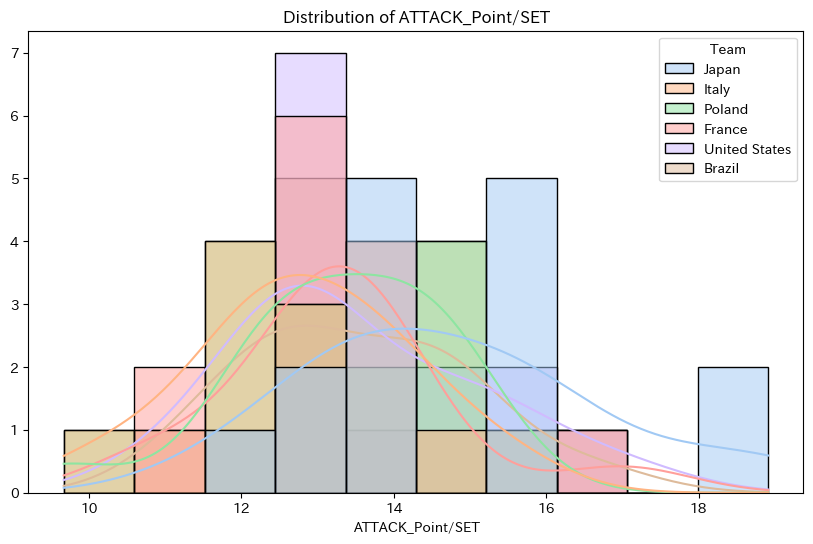

分散 Brazil for ATTACK_Point/SET: 1.47
分散 France for ATTACK_Point/SET: 1.49
分散 Italy for ATTACK_Point/SET: 1.43
分散 Japan for ATTACK_Point/SET: 1.95
分散 Poland for ATTACK_Point/SET: 1.42
分散 United States for ATTACK_Point/SET: 1.62


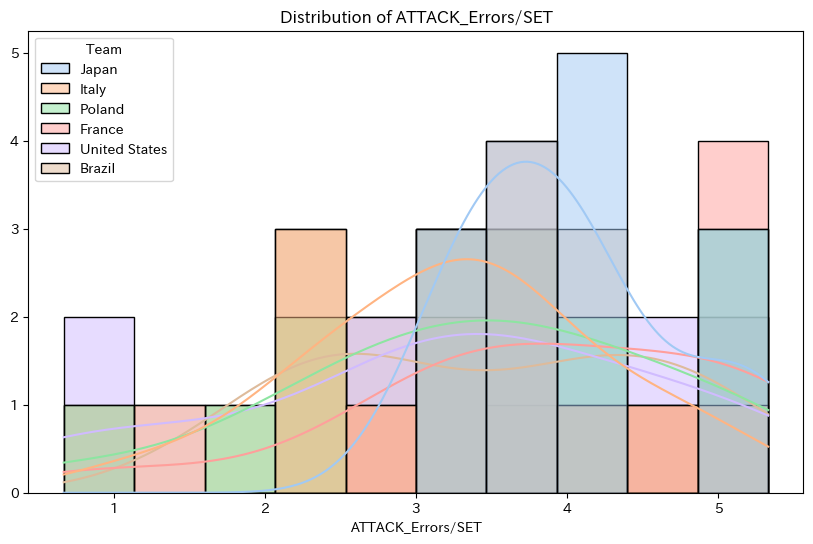

分散 Brazil for ATTACK_Errors/SET: 1.14
分散 France for ATTACK_Errors/SET: 1.24
分散 Italy for ATTACK_Errors/SET: 0.98
分散 Japan for ATTACK_Errors/SET: 0.70
分散 Poland for ATTACK_Errors/SET: 1.26
分散 United States for ATTACK_Errors/SET: 1.41


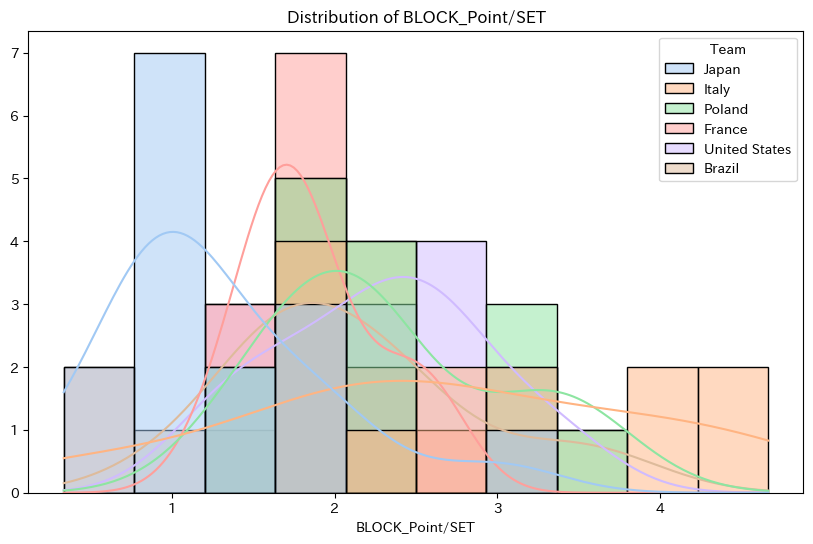

分散 Brazil for BLOCK_Point/SET: 0.74
分散 France for BLOCK_Point/SET: 0.42
分散 Italy for BLOCK_Point/SET: 1.27
分散 Japan for BLOCK_Point/SET: 0.66
分散 Poland for BLOCK_Point/SET: 0.72
分散 United States for BLOCK_Point/SET: 0.65


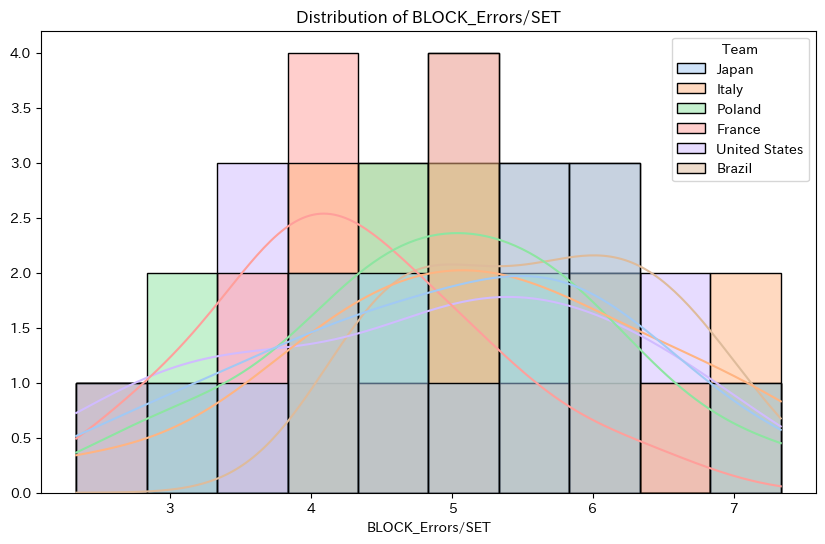

分散 Brazil for BLOCK_Errors/SET: 0.89
分散 France for BLOCK_Errors/SET: 0.95
分散 Italy for BLOCK_Errors/SET: 1.32
分散 Japan for BLOCK_Errors/SET: 1.31
分散 Poland for BLOCK_Errors/SET: 1.15
分散 United States for BLOCK_Errors/SET: 1.40


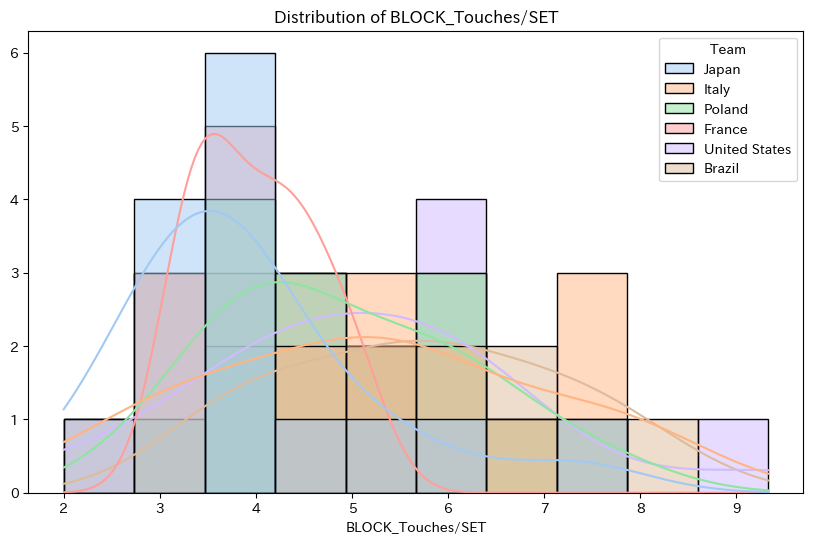

分散 Brazil for BLOCK_Touches/SET: 1.44
分散 France for BLOCK_Touches/SET: 0.62
分散 Italy for BLOCK_Touches/SET: 1.73
分散 Japan for BLOCK_Touches/SET: 1.26
分散 Poland for BLOCK_Touches/SET: 1.33
分散 United States for BLOCK_Touches/SET: 1.72


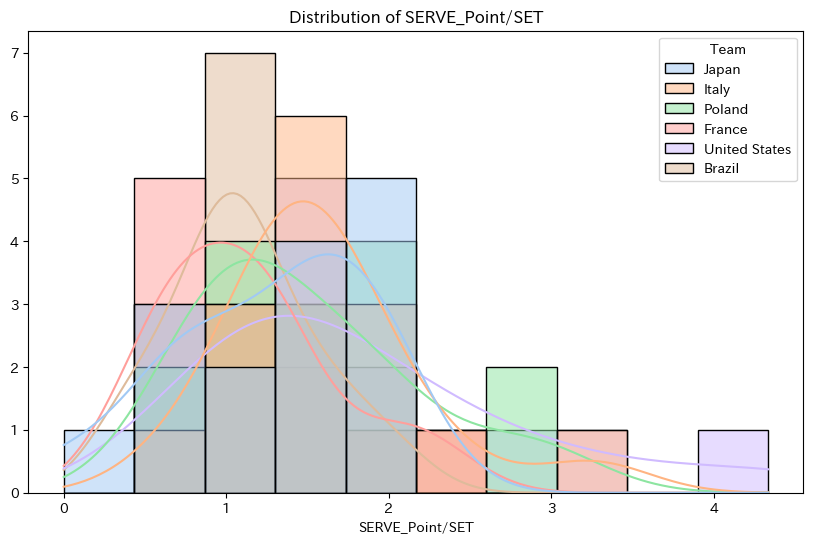

分散 Brazil for SERVE_Point/SET: 0.45
分散 France for SERVE_Point/SET: 0.53
分散 Italy for SERVE_Point/SET: 0.61
分散 Japan for SERVE_Point/SET: 0.60
分散 Poland for SERVE_Point/SET: 0.68
分散 United States for SERVE_Point/SET: 0.98


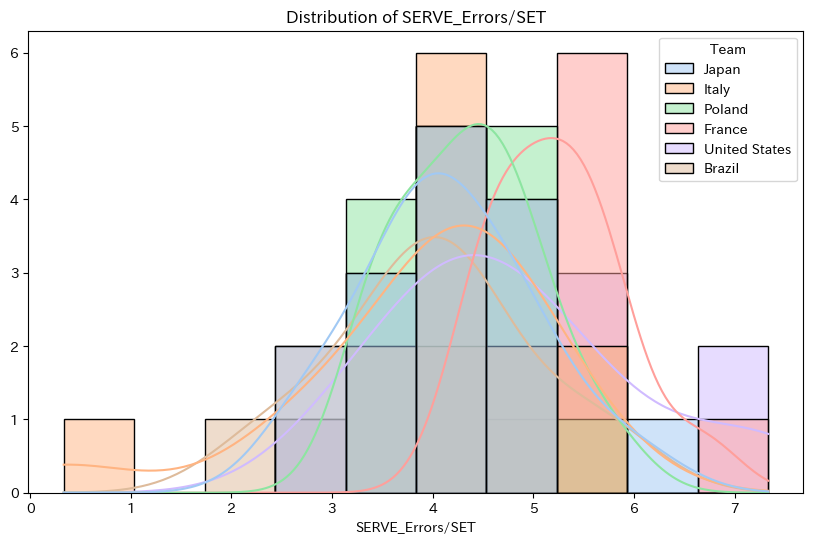

分散 Brazil for SERVE_Errors/SET: 0.99
分散 France for SERVE_Errors/SET: 0.65
分散 Italy for SERVE_Errors/SET: 1.27
分散 Japan for SERVE_Errors/SET: 0.88
分散 Poland for SERVE_Errors/SET: 0.70
分散 United States for SERVE_Errors/SET: 1.24


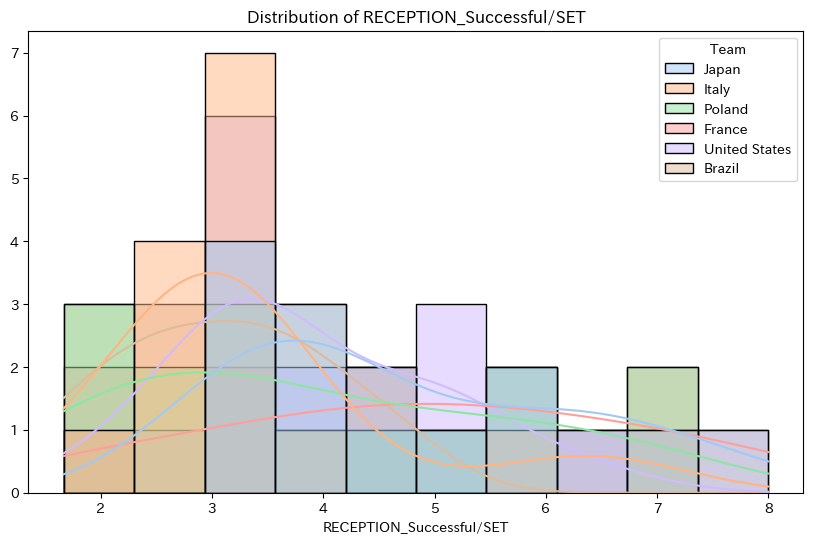

分散 Brazil for RECEPTION_Successful/SET: 0.95
分散 France for RECEPTION_Successful/SET: 1.89
分散 Italy for RECEPTION_Successful/SET: 1.32
分散 Japan for RECEPTION_Successful/SET: 1.50
分散 Poland for RECEPTION_Successful/SET: 1.72
分散 United States for RECEPTION_Successful/SET: 1.16


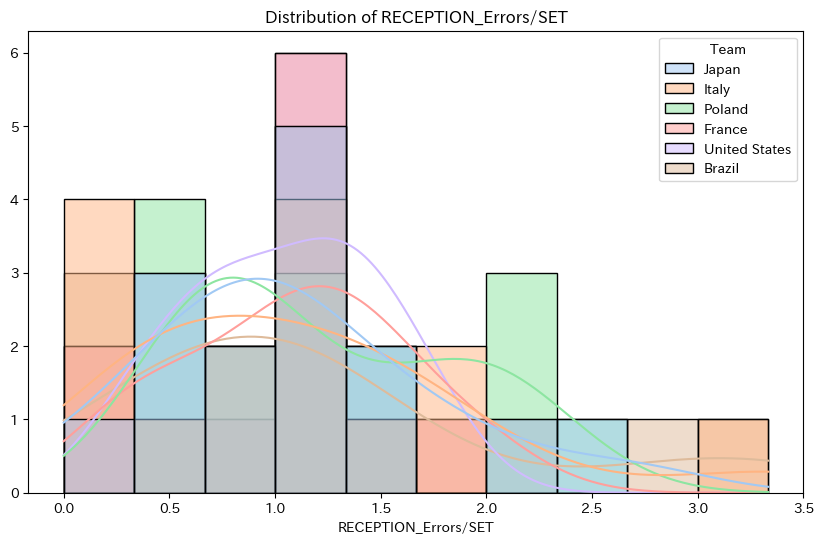

分散 Brazil for RECEPTION_Errors/SET: 0.93
分散 France for RECEPTION_Errors/SET: 0.53
分散 Italy for RECEPTION_Errors/SET: 0.81
分散 Japan for RECEPTION_Errors/SET: 0.67
分散 Poland for RECEPTION_Errors/SET: 0.63
分散 United States for RECEPTION_Errors/SET: 0.45


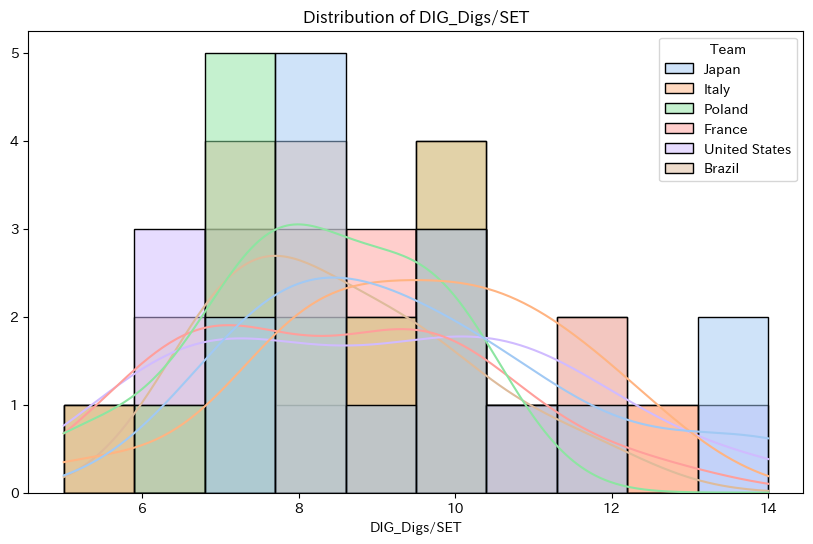

分散 Brazil for DIG_Digs/SET: 1.54
分散 France for DIG_Digs/SET: 1.91
分散 Italy for DIG_Digs/SET: 1.87
分散 Japan for DIG_Digs/SET: 2.15
分散 Poland for DIG_Digs/SET: 1.50
分散 United States for DIG_Digs/SET: 2.32


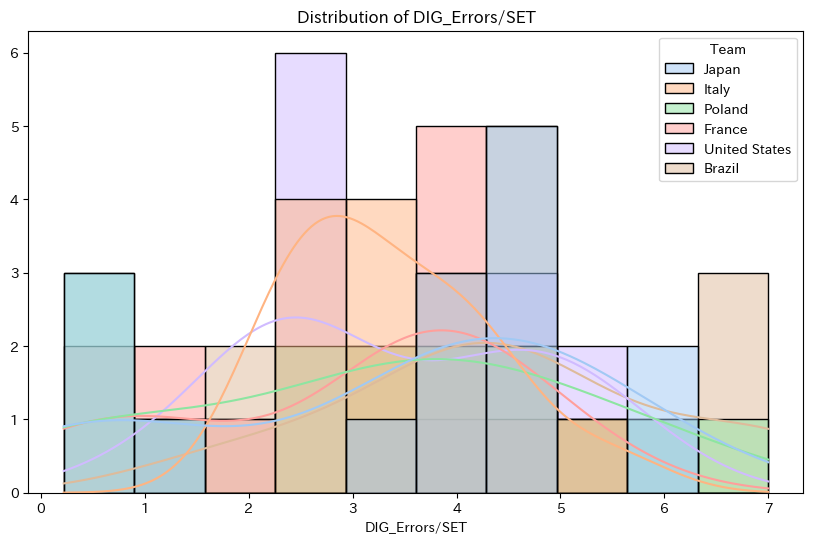

分散 Brazil for DIG_Errors/SET: 1.63
分散 France for DIG_Errors/SET: 1.60
分散 Italy for DIG_Errors/SET: 0.95
分散 Japan for DIG_Errors/SET: 1.92
分散 Poland for DIG_Errors/SET: 1.93
分散 United States for DIG_Errors/SET: 1.42


In [5]:
# データの分布を確認

# カスタムカラーパレット
custom_palette = sns.color_palette("pastel", n_colors=len(select_country))

for column in select_columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_compare, x=column, hue='Team', kde=True, palette=custom_palette, bins=10)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('')
    plt.show()

    for country in select_country:
        std_dev = df_compare.loc[df_compare['Team'] == country, column].std()
        print(f'分散 {country} for {column}: {std_dev:.2f}')

<Axes: >

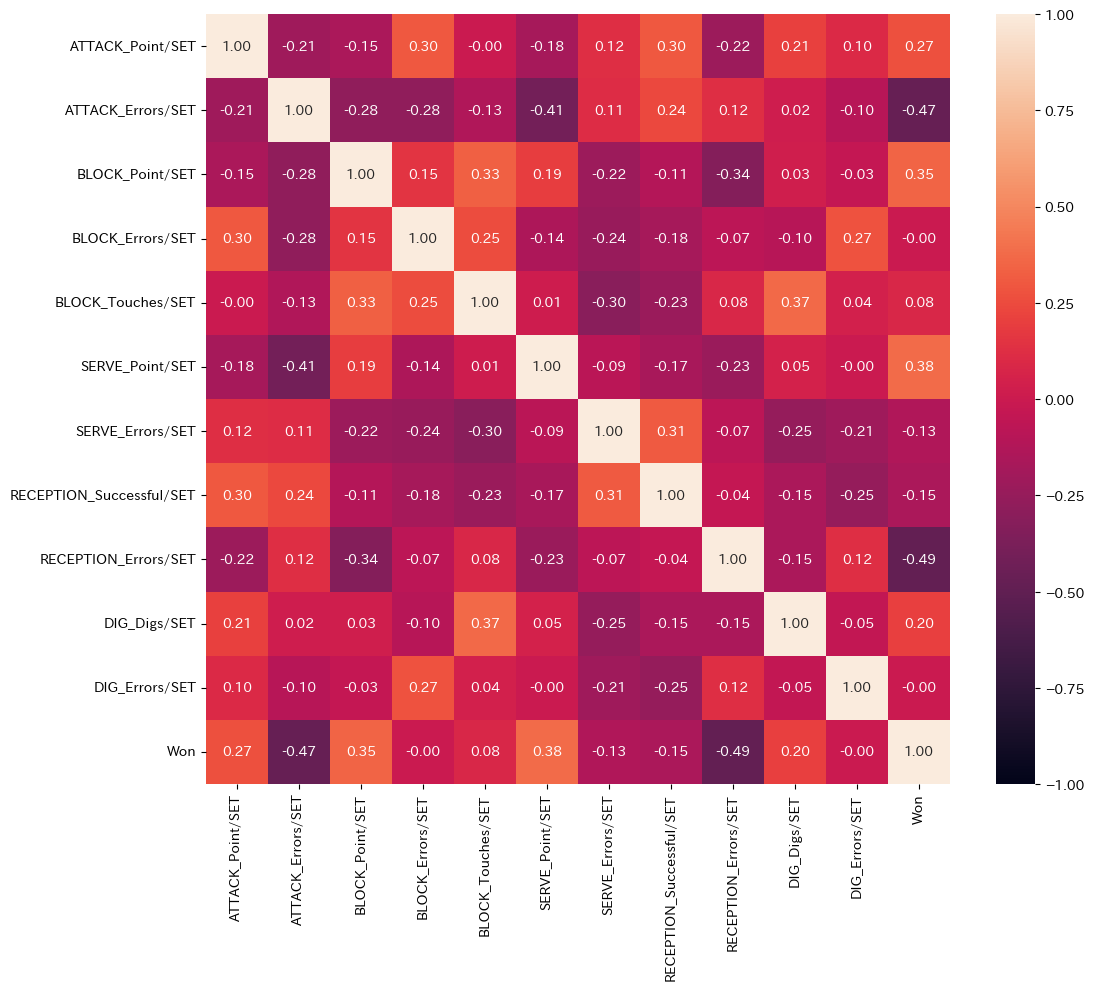

In [6]:
#各特徴量と勝敗の関係を確認
df_heat = df_compare.copy()
df_heat['Won'] = df['Won']
plt.figure(figsize=(12, 10))
sns.heatmap(df_heat.corr(numeric_only=True), annot=True,fmt='.2f', vmin = -1, vmax = 1)

### 結果
- 1セットあたりのアタックミス・サーブレシーブミス本数が勝敗と負の相関があることがわかった

## 4.2 世界ランキング上位5カ国+日本の平均本数の区間推定を実施し、日本と各国の違いを分析
- 各変数の区間推定を実施（信頼区間95%）し、日本と各国の平均本数に差があるかを確認  

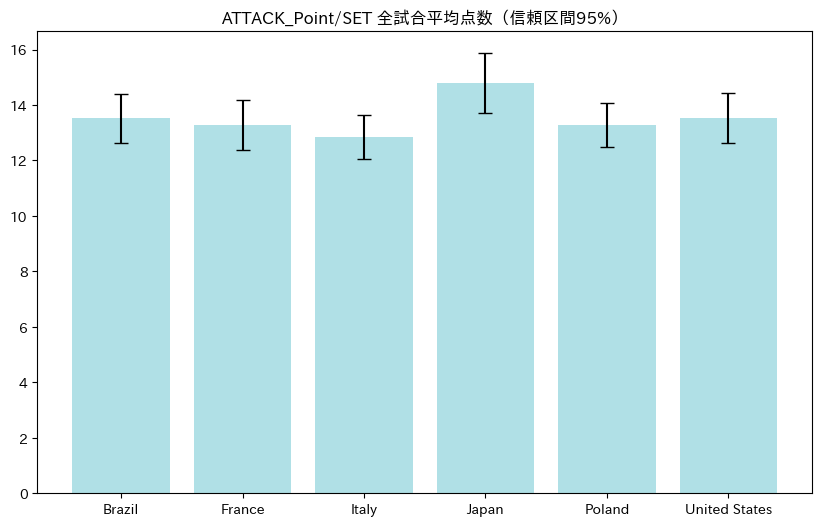

Brazil - Mean: 13.53, Confidence Interval: (12.64, 14.41)
France - Mean: 13.28, Confidence Interval: (12.39, 14.18)
Italy - Mean: 12.84, Confidence Interval: (12.05, 13.63)
Japan - Mean: 14.79, Confidence Interval: (13.71, 15.86)
Poland - Mean: 13.28, Confidence Interval: (12.49, 14.06)
United States - Mean: 13.53, Confidence Interval: (12.63, 14.43)


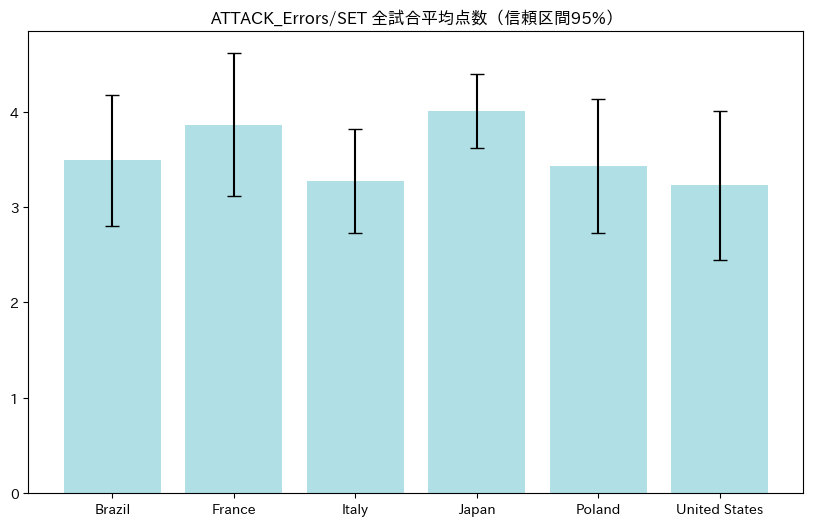

Brazil - Mean: 3.49, Confidence Interval: (2.80, 4.18)
France - Mean: 3.86, Confidence Interval: (3.12, 4.61)
Italy - Mean: 3.27, Confidence Interval: (2.73, 3.82)
Japan - Mean: 4.00, Confidence Interval: (3.62, 4.39)
Poland - Mean: 3.43, Confidence Interval: (2.73, 4.13)
United States - Mean: 3.23, Confidence Interval: (2.44, 4.01)


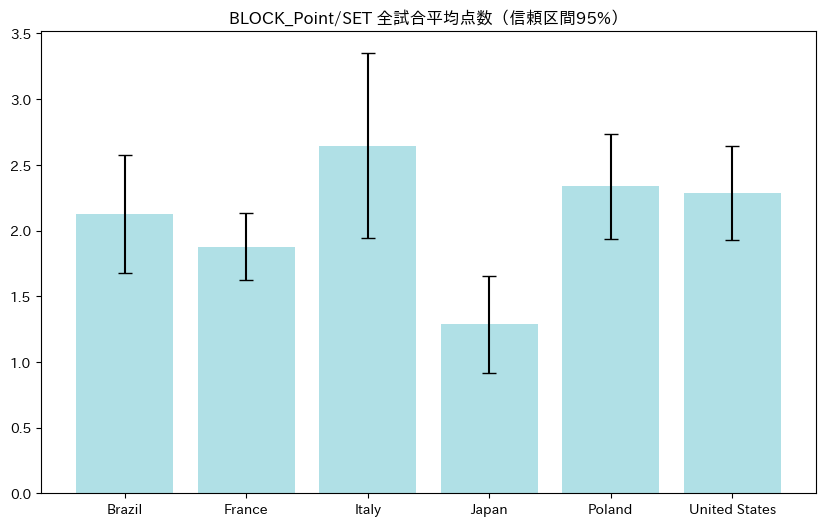

Brazil - Mean: 2.12, Confidence Interval: (1.68, 2.57)
France - Mean: 1.88, Confidence Interval: (1.62, 2.13)
Italy - Mean: 2.65, Confidence Interval: (1.94, 3.35)
Japan - Mean: 1.29, Confidence Interval: (0.92, 1.65)
Poland - Mean: 2.34, Confidence Interval: (1.94, 2.73)
United States - Mean: 2.28, Confidence Interval: (1.93, 2.64)


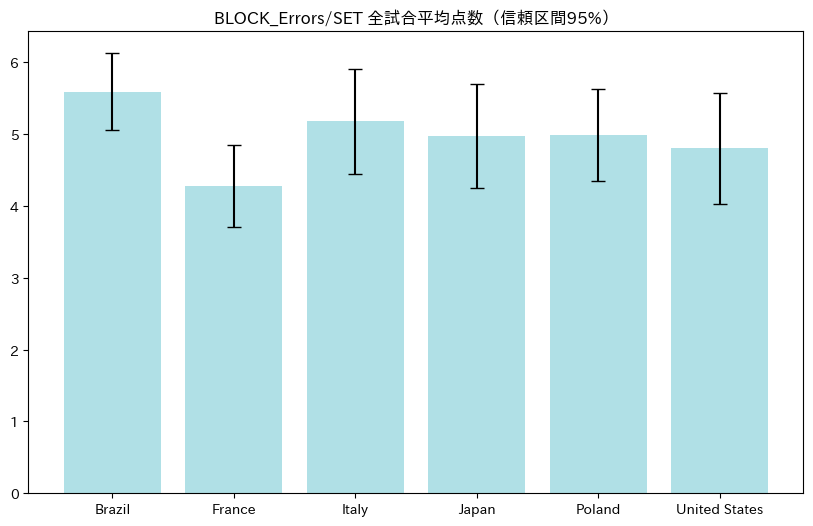

Brazil - Mean: 5.59, Confidence Interval: (5.05, 6.13)
France - Mean: 4.28, Confidence Interval: (3.70, 4.85)
Italy - Mean: 5.18, Confidence Interval: (4.45, 5.91)
Japan - Mean: 4.98, Confidence Interval: (4.26, 5.70)
Poland - Mean: 4.99, Confidence Interval: (4.35, 5.63)
United States - Mean: 4.81, Confidence Interval: (4.03, 5.58)


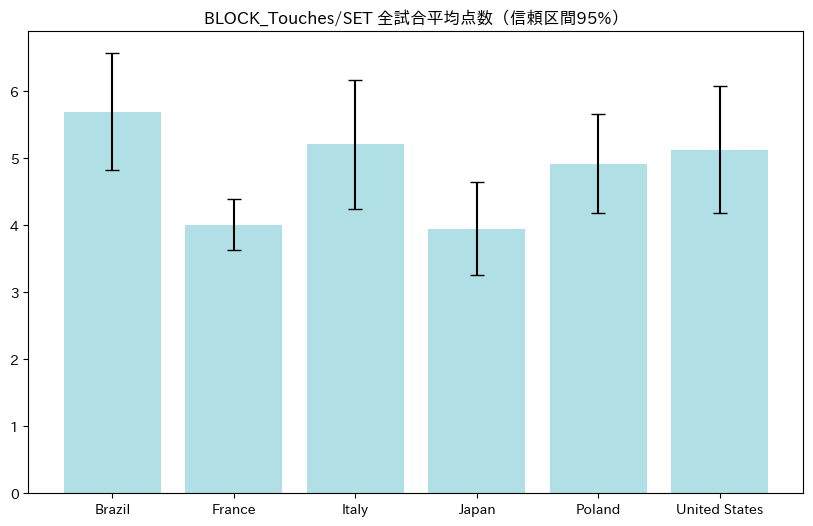

Brazil - Mean: 5.70, Confidence Interval: (4.82, 6.57)
France - Mean: 4.01, Confidence Interval: (3.63, 4.39)
Italy - Mean: 5.21, Confidence Interval: (4.25, 6.17)
Japan - Mean: 3.95, Confidence Interval: (3.25, 4.65)
Poland - Mean: 4.92, Confidence Interval: (4.18, 5.65)
United States - Mean: 5.13, Confidence Interval: (4.18, 6.08)


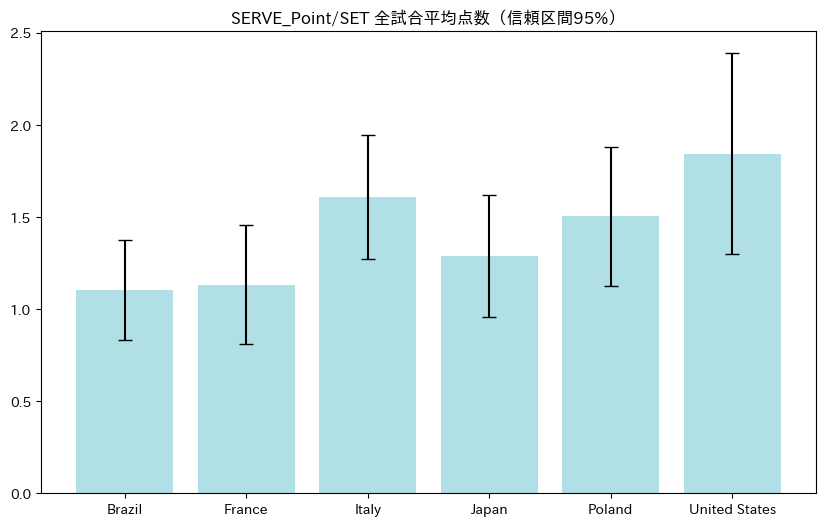

Brazil - Mean: 1.10, Confidence Interval: (0.83, 1.37)
France - Mean: 1.13, Confidence Interval: (0.81, 1.45)
Italy - Mean: 1.61, Confidence Interval: (1.27, 1.94)
Japan - Mean: 1.29, Confidence Interval: (0.95, 1.62)
Poland - Mean: 1.50, Confidence Interval: (1.13, 1.88)
United States - Mean: 1.84, Confidence Interval: (1.30, 2.39)


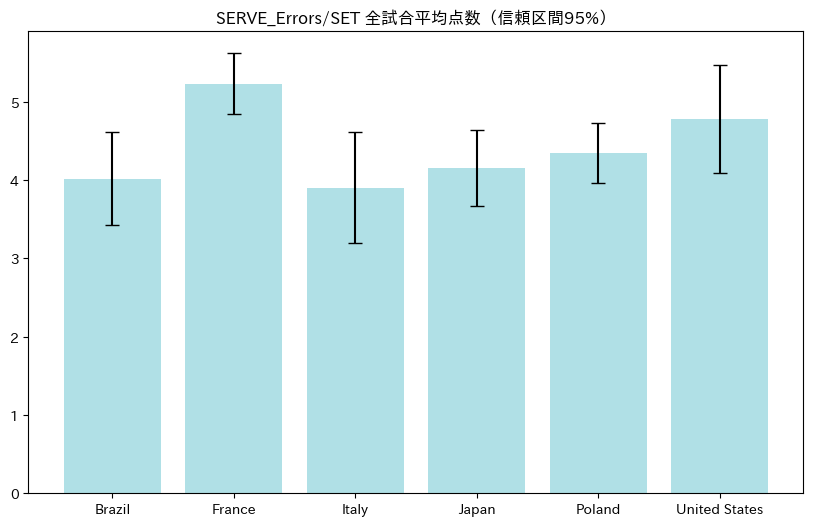

Brazil - Mean: 4.02, Confidence Interval: (3.42, 4.61)
France - Mean: 5.23, Confidence Interval: (4.84, 5.62)
Italy - Mean: 3.90, Confidence Interval: (3.20, 4.61)
Japan - Mean: 4.16, Confidence Interval: (3.67, 4.64)
Poland - Mean: 4.35, Confidence Interval: (3.96, 4.73)
United States - Mean: 4.78, Confidence Interval: (4.09, 5.47)


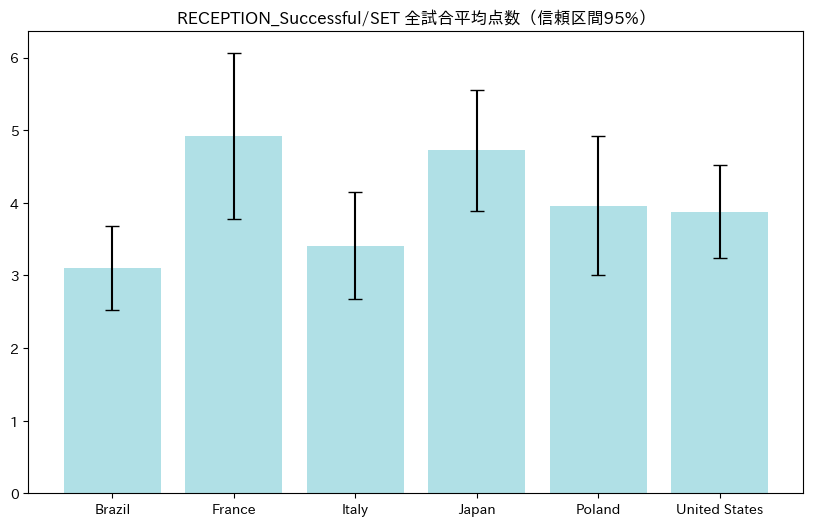

Brazil - Mean: 3.10, Confidence Interval: (2.53, 3.68)
France - Mean: 4.91, Confidence Interval: (3.77, 6.06)
Italy - Mean: 3.41, Confidence Interval: (2.68, 4.14)
Japan - Mean: 4.72, Confidence Interval: (3.89, 5.55)
Poland - Mean: 3.96, Confidence Interval: (3.01, 4.91)
United States - Mean: 3.88, Confidence Interval: (3.24, 4.52)


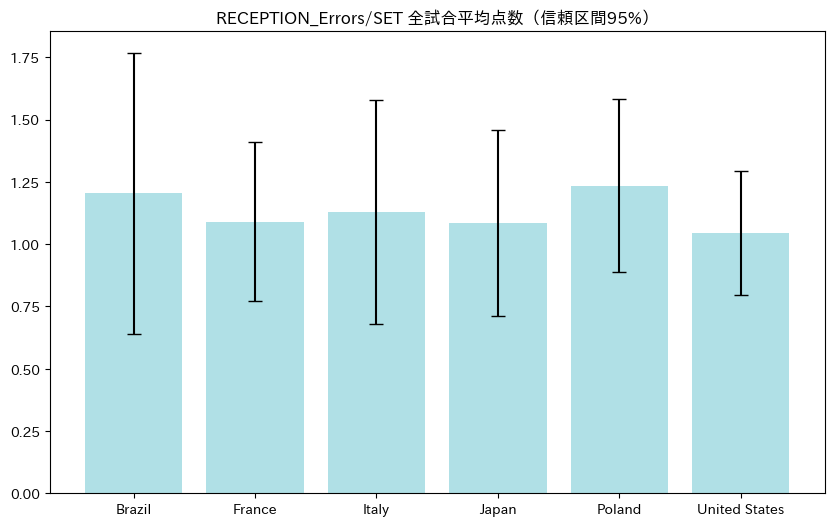

Brazil - Mean: 1.20, Confidence Interval: (0.64, 1.77)
France - Mean: 1.09, Confidence Interval: (0.77, 1.41)
Italy - Mean: 1.13, Confidence Interval: (0.68, 1.58)
Japan - Mean: 1.08, Confidence Interval: (0.71, 1.46)
Poland - Mean: 1.23, Confidence Interval: (0.89, 1.58)
United States - Mean: 1.04, Confidence Interval: (0.80, 1.29)


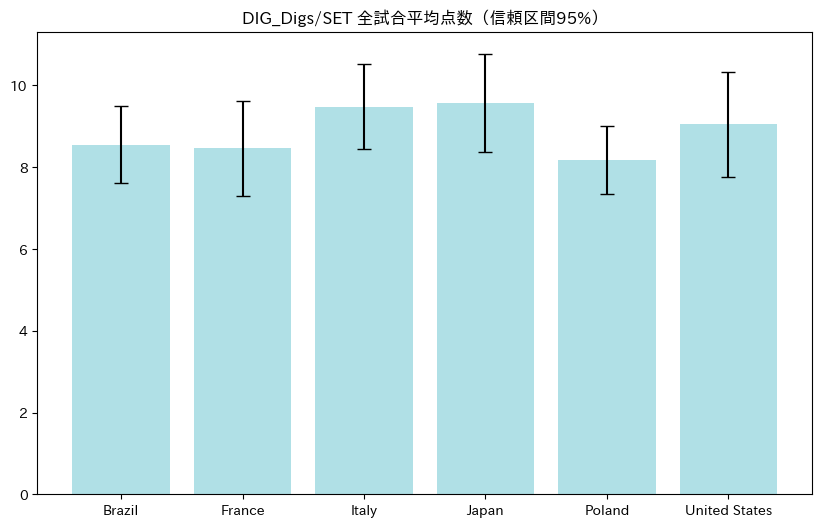

Brazil - Mean: 8.56, Confidence Interval: (7.62, 9.49)
France - Mean: 8.46, Confidence Interval: (7.31, 9.62)
Italy - Mean: 9.48, Confidence Interval: (8.45, 10.51)
Japan - Mean: 9.57, Confidence Interval: (8.38, 10.76)
Poland - Mean: 8.19, Confidence Interval: (7.35, 9.02)
United States - Mean: 9.05, Confidence Interval: (7.77, 10.33)


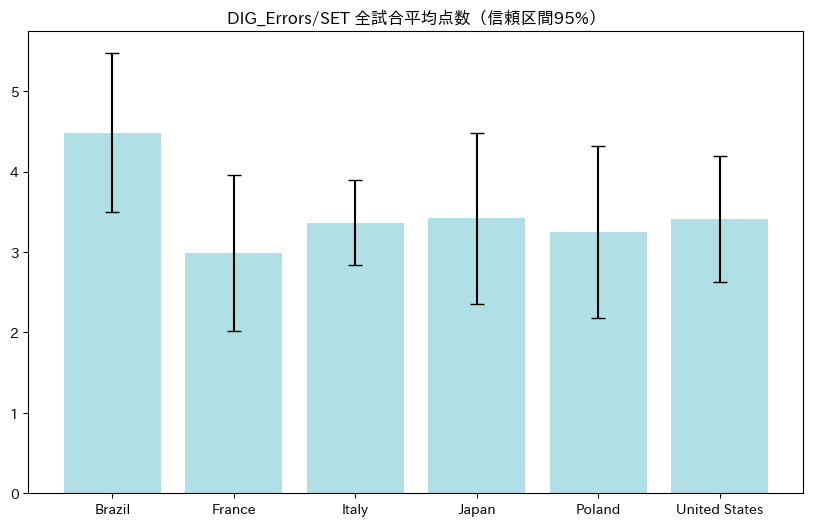

Brazil - Mean: 4.48, Confidence Interval: (3.50, 5.47)
France - Mean: 2.99, Confidence Interval: (2.02, 3.96)
Italy - Mean: 3.36, Confidence Interval: (2.83, 3.89)
Japan - Mean: 3.42, Confidence Interval: (2.36, 4.48)
Poland - Mean: 3.25, Confidence Interval: (2.18, 4.31)
United States - Mean: 3.41, Confidence Interval: (2.63, 4.20)


In [7]:
plot_columns = ['ATTACK_Point/SET', 'ATTACK_Errors/SET',
                'BLOCK_Point/SET', 'BLOCK_Errors/SET', 'BLOCK_Touches/SET',
                'SERVE_Point/SET', 'SERVE_Errors/SET',
                'RECEPTION_Successful/SET', 'RECEPTION_Errors/SET',
                'DIG_Digs/SET', 'DIG_Errors/SET']

# 平均値の区間推定
confidence_level = 0.95
results = {} #plotをするための情報を格納するための辞書

for plot in plot_columns:
    dic_means = {} #各国の平均値と信頼区間を辞書型として保持するため作成
    errors = []
    for country in select_country:
        data = df_compare[df_compare['Team'] == country][plot]
        mean = np.mean(data)
        sem = stats.sem(data)
        confidence_interval = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem) #自由度len(data)-1のt分布より信頼区間を算出
        dic_means[country] = (mean, confidence_interval) #各国のデータを辞書型に登録
        errors.append((mean - confidence_interval[0], confidence_interval[1] - mean))


    # データの準備
    countries = list(dic_means.keys())
    means = [dic_means[country][0] for country in countries]
    error_bars = np.array(errors).T #yerr引数に合わせるため転置

    # 結果を辞書型に
    results[plot] = {
        'countries': countries,
        'means': means,
        'error_bars': error_bars
    }

    # グラフの作成
    plt.figure(figsize=(10, 6))
    plt.bar(countries, means, yerr=error_bars, capsize=5, color='powderblue')
    plt.ylabel('')
    plt.title(f'{plot} 全試合平均点数（信頼区間95%）')
    plt.xticks(rotation=0)
    plt.show()


    # 区間推定値の表示
    for country, (mean, interval) in dic_means.items():
        print(f"{country} - Mean: {mean:.2f}, Confidence Interval: ({interval[0]:.2f}, {interval[1]:.2f})")

#### 結果
- **ATTACK_Point/SET**: 日本の1セットあたりの決定本数は14.8本/SET（信頼区間95%）と最も多かった。
- **RECEPTION_Successful/SET**: 日本の1セットあたりの成功本数は4.72本/SET（信頼区間95%）と2番目に多かった。
- **BLOCK_Point/SET**: 日本の1セットあたりの決定本数は2.7本/SET（信頼区間95%）と最も少なかった。
- **BLOCK_Touches/SET**: 日本の1セットあたりのブロックタッチは4.0本と/SET（信頼区間95%）と最も少なかった。
- **DIG_DIGs/SET**: 日本の1セットあたりのディグをあげた本数は9.57本/SET（信頼区間95%）と最も多かったが、他国と大きな差は見られなかった。

## 4.3 世界ランキング上位5カ国+日本のデータでクラスタリングを行い、クラスタ間の違いを分析
- 階層的クラスタリングを行い（データは全て1セット中の得点のため標準化は行わず）、クラスタ間の平均本数に差があるかを確認

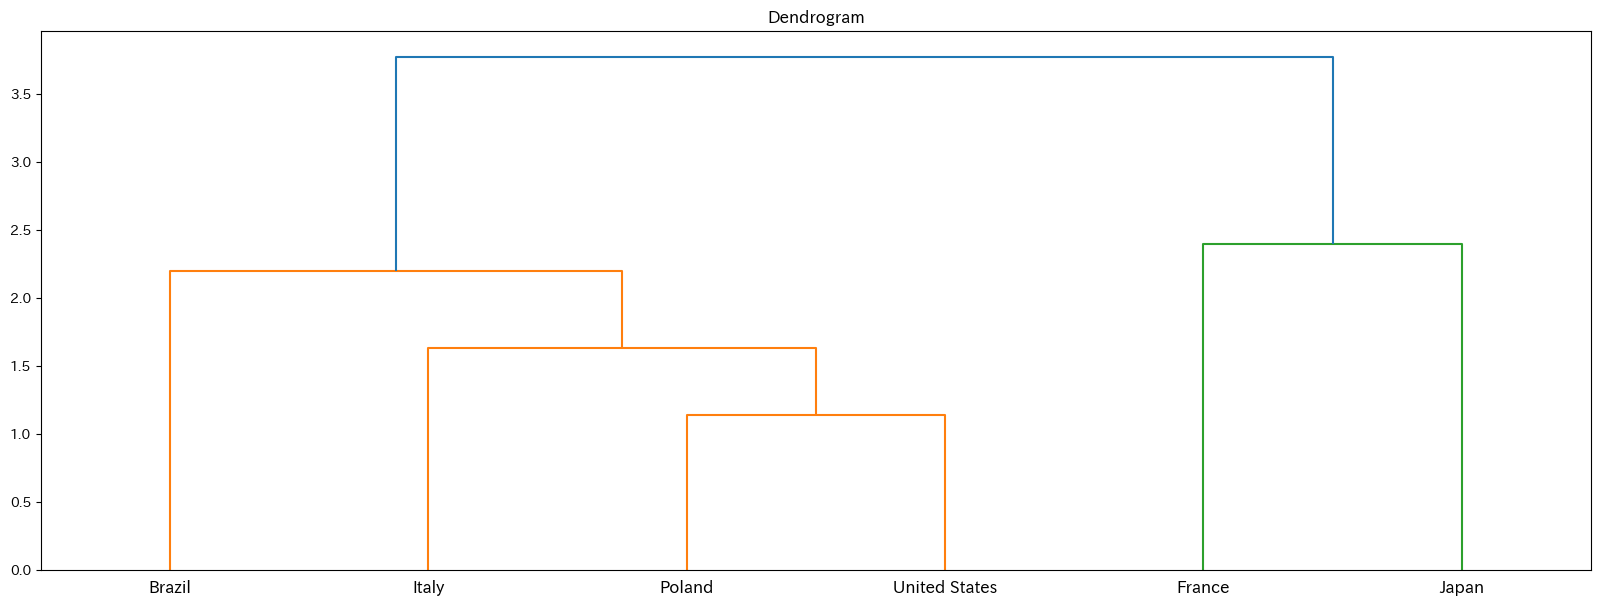

In [8]:
#分析に使用するカラムの抽出
select_columns = ['Team', 'ATTACK_Point/SET', 'ATTACK_Errors/SET',
                  'BLOCK_Point/SET', 'BLOCK_Errors/SET', 'BLOCK_Touches/SET',
                  'SERVE_Point/SET', 'SERVE_Errors/SET',
                  'RECEPTION_Successful/SET', 'RECEPTION_Errors/SET',
                  'DIG_Digs/SET', 'DIG_Errors/SET']
#世界ランキング上位国を抽出
select_country = ['Brazil', 'France', 'Italy', 'Japan', 'Poland', 'United States']
# データフレームから特定の国のみ抽出
df_compare = df[df['Team'].isin(select_country)][select_columns]
#各国のデータを平均で集約
df_hie = df_compare.groupby('Team').mean()

#階層的クラスタリング
result = linkage(df_hie, method='ward')

#デンドログラム
plt.figure(figsize=(20, 7))
plt.title('Dendrogram')
dendrogram(result, orientation='top', labels=df_hie.index)
plt.show()

#### クラスタは以下のようになった
| cluster | 国名 |
| :--- | :--- |
| cluster1 | イタリア・ブラジル・ポーランド・US |
| cluster2 | フランス・日本 |

In [9]:
#t=4でクラスターを分ける
cluster = fcluster(result, t=2.5, criterion = 'distance')
df_hie['cluster'] = cluster
df_compare = pd.merge(df_compare, df_hie['cluster'], on='Team', how='left')
df_compare.head()

,Team,ATTACK_Point/SET,ATTACK_Errors/SET,BLOCK_Point/SET,BLOCK_Errors/SET,BLOCK_Touches/SET,SERVE_Point/SET,SERVE_Errors/SET,RECEPTION_Successful/SET,RECEPTION_Errors/SET,DIG_Digs/SET,DIG_Errors/SET,cluster
0,Japan,15.666667,4.333333,1.333333,4.000000,3.666667,1.333333,4.000000,3.333333,1.000000,14.000000,0.333333,2
1,Italy,12.333333,5.000000,0.666667,2.333333,2.333333,0.666667,4.333333,2.666667,1.333333,11.333333,3.000000,1
2,Poland,13.250000,4.250000,3.250000,3.000000,3.500000,2.000000,4.750000,6.750000,0.750000,6.000000,1.500000,1
3,France,12.750000,5.000000,1.750000,4.000000,3.750000,0.750000,5.250000,5.500000,2.000000,7.000000,0.250000,2
4,United States,13.666667,2.666667,2.666667,2.333333,3.666667,2.000000,5.000000,5.333333,1.000000,9.333333,2.000000,1


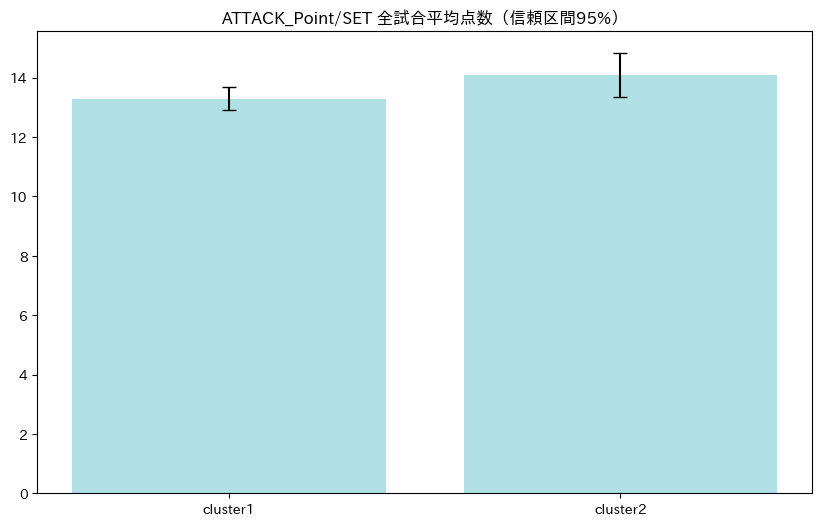

cluster 1 - Mean: 13.28, Confidence Interval: (12.90, 13.67)
cluster 2 - Mean: 14.09, Confidence Interval: (13.36, 14.82)


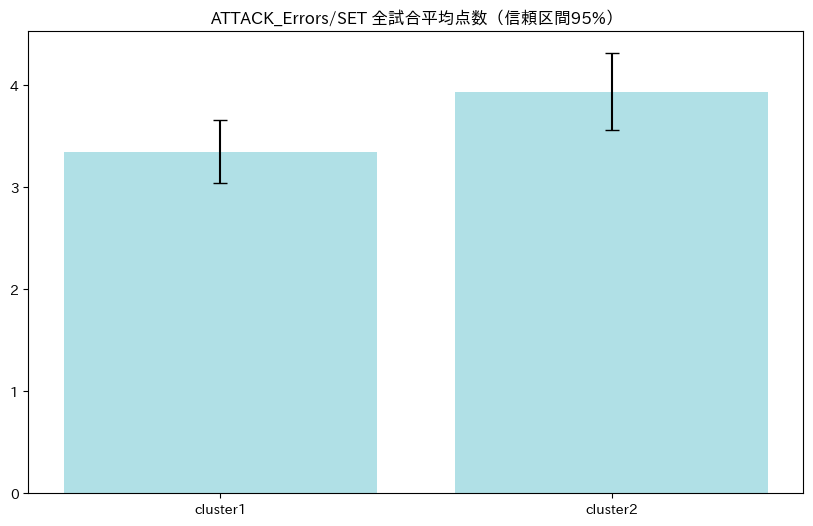

cluster 1 - Mean: 3.35, Confidence Interval: (3.04, 3.66)
cluster 2 - Mean: 3.94, Confidence Interval: (3.56, 4.32)


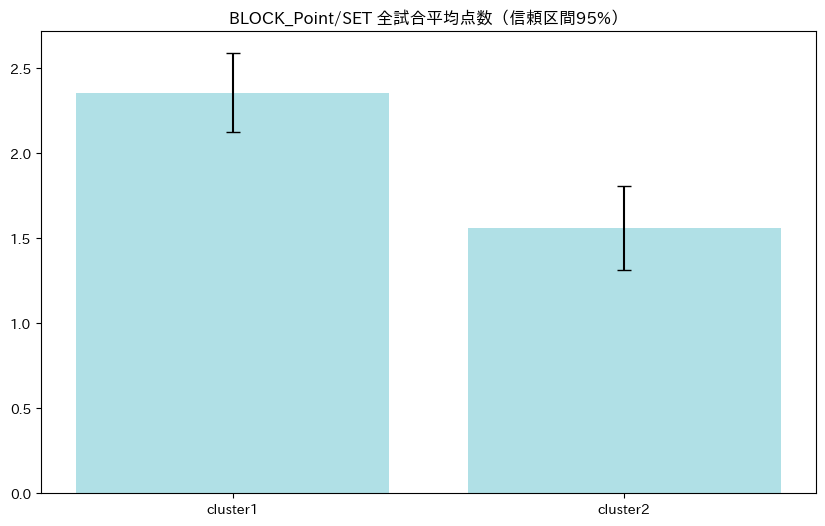

cluster 1 - Mean: 2.36, Confidence Interval: (2.12, 2.59)
cluster 2 - Mean: 1.56, Confidence Interval: (1.32, 1.80)


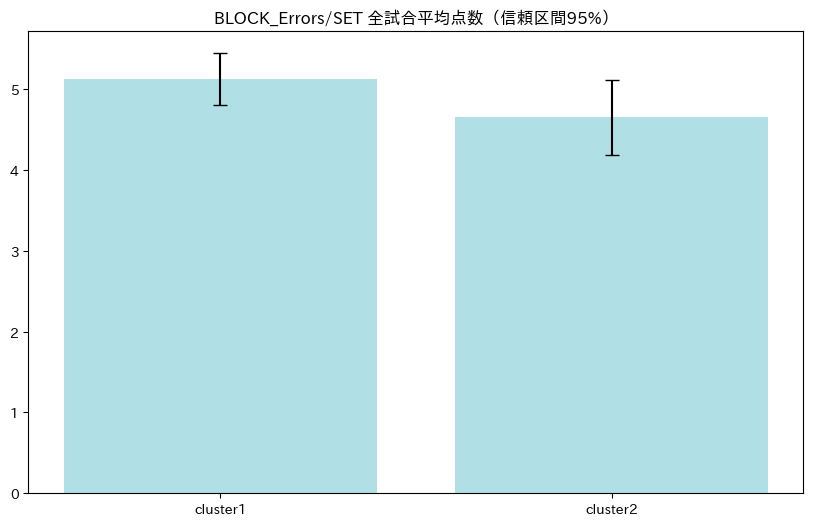

cluster 1 - Mean: 5.13, Confidence Interval: (4.81, 5.45)
cluster 2 - Mean: 4.65, Confidence Interval: (4.19, 5.11)


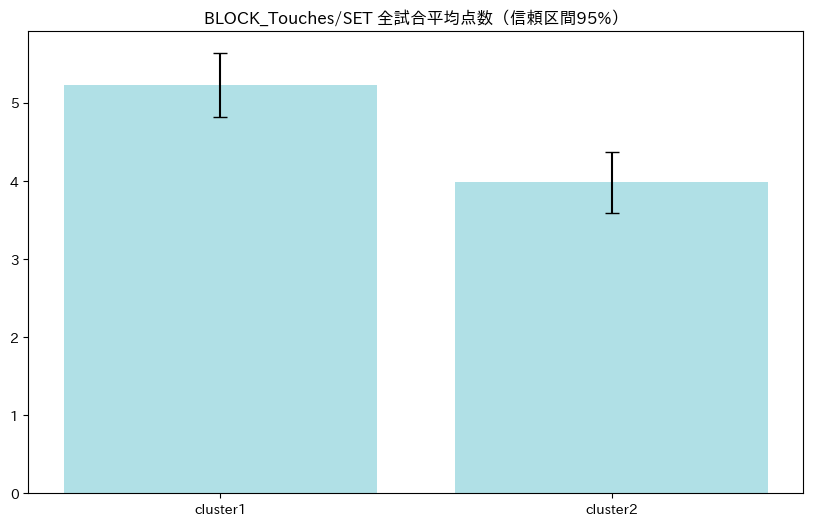

cluster 1 - Mean: 5.22, Confidence Interval: (4.81, 5.63)
cluster 2 - Mean: 3.98, Confidence Interval: (3.59, 4.36)


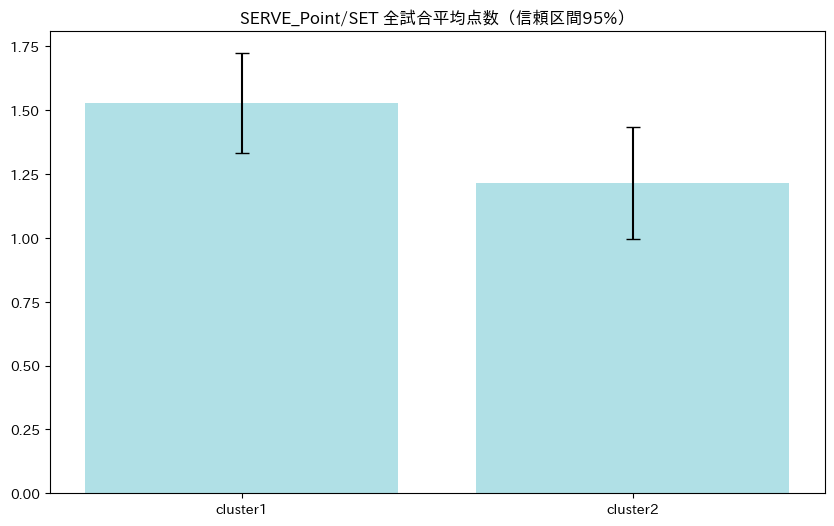

cluster 1 - Mean: 1.53, Confidence Interval: (1.33, 1.72)
cluster 2 - Mean: 1.21, Confidence Interval: (1.00, 1.43)


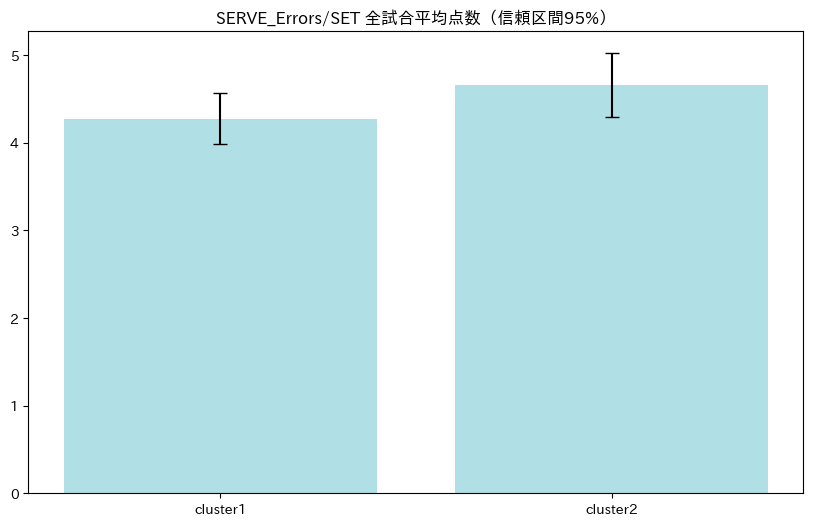

cluster 1 - Mean: 4.27, Confidence Interval: (3.98, 4.56)
cluster 2 - Mean: 4.65, Confidence Interval: (4.29, 5.02)


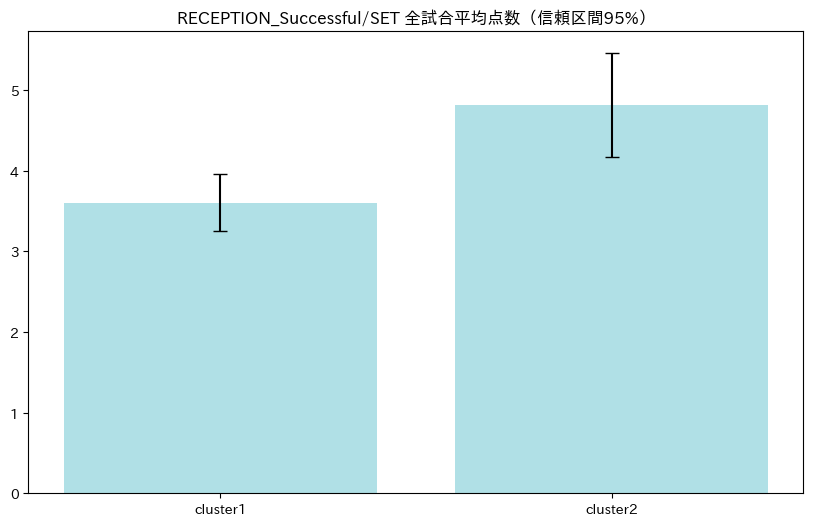

cluster 1 - Mean: 3.60, Confidence Interval: (3.25, 3.96)
cluster 2 - Mean: 4.81, Confidence Interval: (4.17, 5.46)


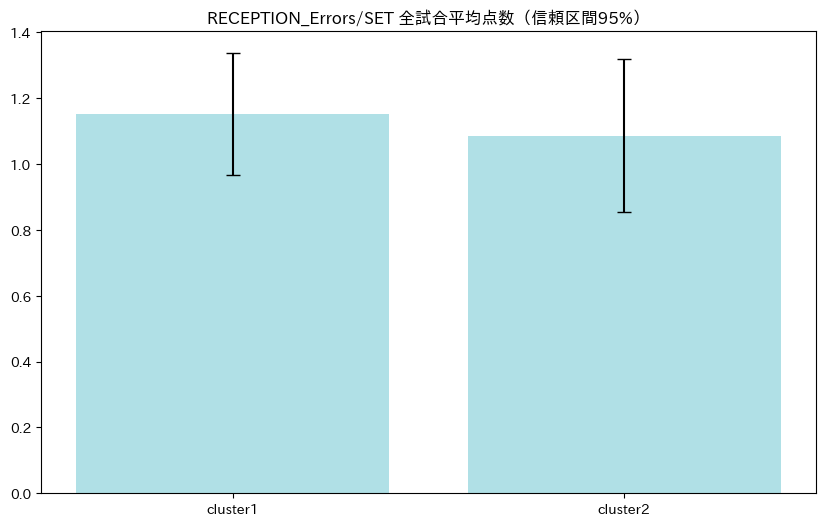

cluster 1 - Mean: 1.15, Confidence Interval: (0.97, 1.34)
cluster 2 - Mean: 1.09, Confidence Interval: (0.85, 1.32)


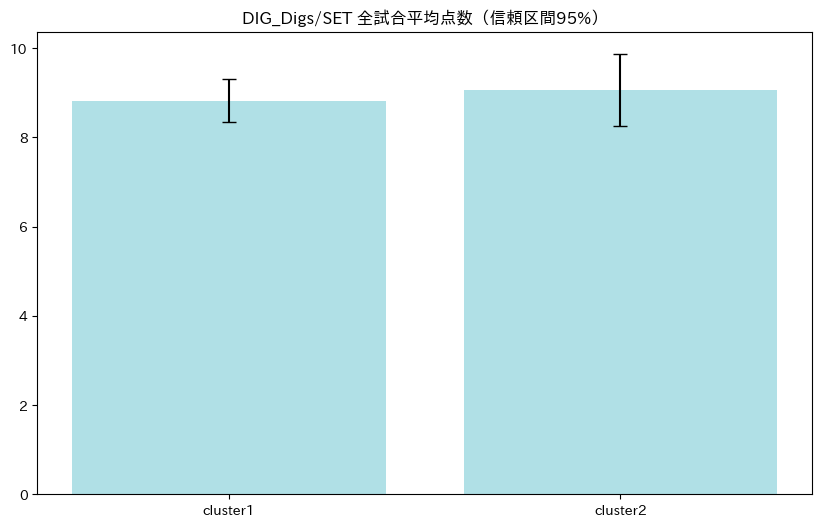

cluster 1 - Mean: 8.83, Confidence Interval: (8.34, 9.32)
cluster 2 - Mean: 9.06, Confidence Interval: (8.25, 9.86)


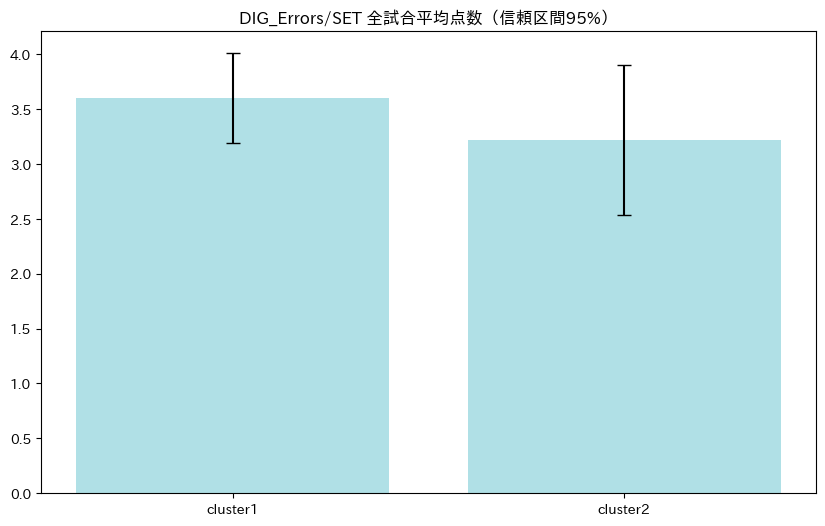

cluster 1 - Mean: 3.60, Confidence Interval: (3.19, 4.01)
cluster 2 - Mean: 3.22, Confidence Interval: (2.54, 3.90)


In [10]:
# 平均値の区間推定
confidence_level = 0.95
results = {}

plot_columns = ['ATTACK_Point/SET', 'ATTACK_Errors/SET',
                'BLOCK_Point/SET', 'BLOCK_Errors/SET', 'BLOCK_Touches/SET',
                'SERVE_Point/SET', 'SERVE_Errors/SET',
                'RECEPTION_Successful/SET', 'RECEPTION_Errors/SET',
                'DIG_Digs/SET', 'DIG_Errors/SET']

# クラスタラベルを作成
cluster_labels = {cluster: f'cluster{cluster}' for cluster in sorted(df_compare['cluster'].unique())}

for plot in plot_columns:
    dic_means = {}
    errors = []
    for cluster in sorted(df_compare['cluster'].unique()):
        data = df_compare[df_compare['cluster'] == cluster][plot]
        mean = np.mean(data)
        sem = stats.sem(data)
        confidence_interval = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem)
        dic_means[cluster] = (mean, confidence_interval)
        errors.append((mean - confidence_interval[0], confidence_interval[1] - mean))

    # データの準備
    clusters = list(dic_means.keys())
    means = [dic_means[cluster][0] for cluster in clusters]
    error_bars = np.array(errors).T

    # 結果を辞書型に
    results[plot] = {
        'clusters': clusters,
        'means': means,
        'error_bars': error_bars
    }

    # グラフの作成
    plt.figure(figsize=(10, 6))
    plt.bar([cluster_labels[cluster] for cluster in clusters], means, yerr=error_bars, capsize=5, color='powderblue')
    plt.ylabel('')
    plt.title(f'{plot} 全試合平均点数（信頼区間95%）')
    plt.xticks(rotation=0)
    plt.show()


    # 区間推定値の表示
    for cluster, (mean, interval) in dic_means.items():
        print(f"cluster {cluster} - Mean: {mean:.2f}, Confidence Interval: ({interval[0]:.2f}, {interval[1]:.2f})")

#### 結果
- **ATTACK_Point/SET**: cluster2はcluster1と比較して1セットあたり平均0.8本多く決まっている。
- **BLOCK_Point/SET**: cluster1はcluster2と比較して1セットあたり平均0.8本多く決まっている。
- **BLOCK_Touches/SET**: cluster1はcluster2と比較して1セットあたり平均1.2本多い。
- **RECEPTION_Successful/SET**: cluster2はcluster1と比較して1セットあたり平均1.2本成功している。

#### 考察
**【強み】**
- 日本が所属するcluster2はcluster1と比較しアタックとサーブレシーブに強みがあり、cluster1はcluster2と比較してブロックに強みがあるクラスタと考えた。日本は世界ランキング上位国と比較しても**ATTACK_Point/SET**, **RECEPTION_Successful/SET**本数が多く、アタックとサーブレシーブ本数に強みのある、cluster2に所属していた。
- 以上の結果から、日本はアタック決定本数とサーブレシーブの正確さに強みがあると考える。

**【弱み】**
- 日本は世界ランキング上位国と比較しても**BLOCK_Point/SET**, **BLOCK_Touches/SET**本数が少なく、ブロックに強みのあるcluster1と比較して**BLOCK_Point/SET**, **BLOCK_Touches/SET**本数がともに少ないcluster2に所属していた。
- 以上の結果から、日本はブロックに課題があると考える。

# 5. 今後の展望
- 「日本が五輪メダル獲得のために強化すべきポイントは何か」という視点で追加で分析を行っていきたい。  
当初は日本が強豪国に勝った勝因と負けた敗因をみることで上記の目的も併せて分析を進めていたが、サンプル数が少なく傾向を掴むことが難しかった。そのため今後の分析では他大会のデータも併せて活用したい。
- アタックの決め方には、コースを狙う、パワーで相手のブロックミスを誘うなど複数の決め方がある。同様にサーブにも決め方のパターンがいくつかあるため、各国の特徴を具体的に把握するためには、アタックの決め方・サーブの決め方などもう少し詳しいデータが必要となる。